# Policy iteration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from GridWorld import *

np.random.seed(0)

In [2]:
def policy_evaluation(grid_world, policy, max_iter, gamma=0.90):
    height, width = grid_world.height, grid_world.width 
    values = np.zeros((width, height))
    for i in range(max_iter):
        for state in grid_world.get_states():
            _, successors = grid_world.get_available_actions(state)
            value = 0
            action = policy[state]
            prob_dist = grid_world.get_transition_prob(state, action)
            for successor, prob in prob_dist.items():
                reward = grid_world.get_reward(state, successor)
                value += prob * (reward + gamma * values[successor[0]][successor[1]])
            values[state[0]][state[1]] = value
    return values

In [3]:
def policy_improvement(grid_world, values, gamma):
    height, width = grid_world.height, grid_world.width 
    policy = dict()
    for state in grid_world.get_states():
        available_actions, successors = grid_world.get_available_actions(state)
        q_value = dict()
        for action in available_actions:
            value = 0
            prob_dist = grid_world.get_transition_prob(state, action)
            for successor, prob in prob_dist.items():
                reward = grid_world.get_reward(state, successor)
                value += prob * (reward + gamma * values[successor[0]][successor[1]])
            q_value[action] = value
        policy[state] = max(q_value, key=q_value.get) if len(q_value) > 0 else None
    return policy

In [4]:
def get_random_policy(grid_world):
    policy = dict()
    states = grid_world.get_states()
    for state in states:
        available_actions, _ = grid_world.get_available_actions(state)
        random_idx = np.random.choice(np.arange(len(available_actions)))
        policy[state] = available_actions[random_idx]
    return policy

In [5]:
def policy_iteration(grid_world, max_iter, gamma):
    policy = get_random_policy(grid_world)
    history = [policy]
    for i in range(max_iter):
        values = policy_evaluation(grid_world, policy, max_iter, gamma)
        policy = policy_improvement(grid_world, values, gamma)
        history.append(policy)
    return policy, history

In [6]:
height = 5
width = 5
exits = {'good_exit': (3, 1), 'bad_exit': (3, 2)}
walls = [(1, 2)]
rewards = {'living_reward': -0.1, 'win_reward': 1, 'lose_reward': -1}
init_pos = None

grid_world = GridWorld(height, width, exits, walls, rewards, init_pos)

In [7]:
policy, history = policy_iteration(grid_world, max_iter=10, gamma=0.1)

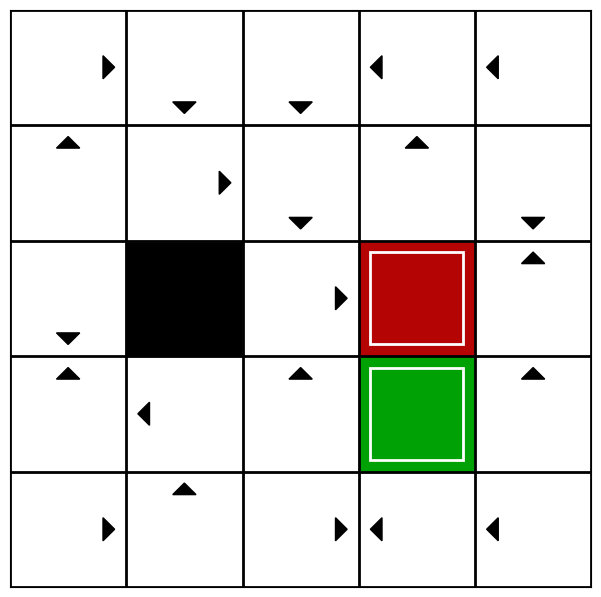

In [8]:
display_policy(grid_world, history[0])

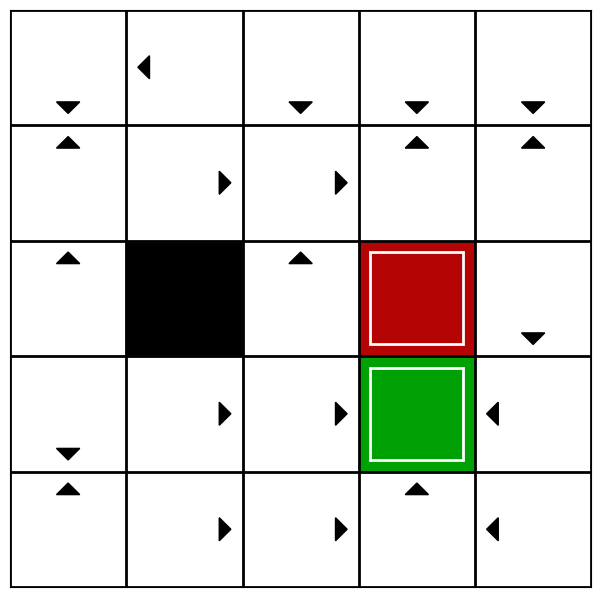

In [9]:
display_policy(grid_world, history[2])

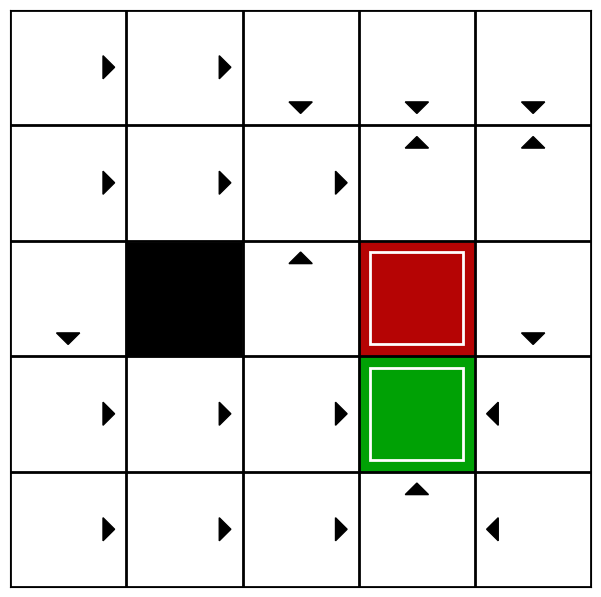

In [10]:
display_policy(grid_world, history[-1])